# Predicción de Sobrevivientes del Titanic

## Parte 1: Importando las librerías necesarias


Python cuenta con una **librería estándar**, que consiste en un conjunto de módulos y funciones que vienen instalados por defecto, y que permiten realizar muchas de las **operaciones básicas de la programación**. Algunas de estas funciones de la librería estándar de Python son: **datatime** (para realizar operaciones con fechas) y **Math** (para operaciones matemáticas avanzadas).


Sin embargo, **para desarrollar proyectos avanzados en Python**, como los relacionados con la Ciencia de Datos (o Data Science), **es preciso hacer uso de determinadas librerías**, que no vienen incluídas en la librería estándar de Python, y que fueron creadas para un fin específico.


Es por ello, que **en este primer paso, se procede a importar las librerías que nos serán útiles** para avanzar con este ejercicio. Éstas librerías son:


* **NumPy:** es una librería escencial para la computación científica con Python. NumPy proporciona, entre otras cosas, soporte para matrices multidimencionales con operaciones básicas en ellas y poderosas funciones de álgebra lineal. Muchas librerías usan la representación matricial de NumPy como una estructura de datos eficiente.


* **Pandas:** es una biblioteca de software escrita como extensión de NumPy para la manipulación y análisis de datos para el lenguaje Python. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.


* **Matplotlib:** es una biblioteca de trazado en 2D de Python. Esta librería puede generar gráficos, histogramas, espectros de potencia, gráficos de barras, gráficos de error, diagramas de dispersión, etc., con solo unas pocas líneas de código. Para un trazado simple, existe el módulo *pyplot*, que hace que Matplotlib funcione como MatLab.


* **Seaborn:** es una biblioteca de visualización de datos de Python basada en Matplotlib e integrado con las estructuras de datos de Pandas. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.


* **Warnings:** es una biblioteca que permite gestionar las advertencias que pudieran surgir al correr un código que contiene, por ejemplo, funciones obsoletas. Para suprimir advertencias, de forma temporal, se puede usar la función filterwarnings().

In [159]:
#Librerías para análisis de datos
import numpy as np
import pandas as pd

#Librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Para ignorar advertencias de forma temporal
import warnings
warnings.filterwarnings('ignore')

## Parte 2: Leyendo y explorando los datos


**Luego de importar las librerías** necesarias para el presente ejercicio, **hay que leer los datos que son objeto de estudio**. Los archivos contentivos de estos datos fueron obtenidos del sitio web de *Kaggle*, en la sección Kernels.


Cabe destacar, que **estos archivos tienen la extensión CSV (*Comma Separated Values*-Valores Separados por Comas)**, por lo que para darle lectura se ha de usar el módulo de Pandas *read_csv()*. Pandas también tiene funciones para leer otros tipos de archivos, como Excel, HDF5, archivos tabulados, o incluso, el contenido de portapapeles (read_Excel(), read_hdf(), read_table(), read_clipboard()). Cualquiera de las funciones que usemos para leer los datos, el resultado de esta lectura es almacenado como una estructura **DataFrame**.


Además de leer los datos con la ayuda de los módulos necesarios, se usa el módulo *head()* de Pandas, que nos permite obtener una vista de solo las primeras cinco filas de nuestro DataFrame. En caso de que se quiera ampliar el número de filas, se debe ingresar el número deseado en dicha función.


**NOTA:** Un **DataFrame** es un tipo de estructura de datos en el que los datos se almacenan en filas y columnas. Su estructura es muy similar a la de una matriz, con la diferencia de que una matriz solo alberga valores númericos, mientras que un DataFrame puede almacenar diferentes tipos de datos. En un DataFrame, cada fila corresponde a un sujeto, y cada columna a una variable.

In [160]:
#Leyendo los archivos CSV de entrenamiento (train) y prueba (test)
train = pd.read_csv("Data_Science_Project_Kaggle/train.csv")
test = pd.read_csv("Data_Science_Project_Kaggle/test.csv")

#Obteniendo una vista general de los datos
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Frauenthal, Dr. Henry William",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Parte 3: Análisis de los datos

En esta parte, se hace un análisis rápido sobre los datos objeto de estudio, con el fin de conocer algunas de sus características, relacionadas con el tipo de valor de sus variables y con su integridad.

En este sentido, se emplearán algunas funciones de Pandas para visualizar y gestionar los datos del DataFrame, y también para conocer los datos faltantes de cada variable.

In [161]:
#Obteniendo una lista con las variables presentes en el conjunto de datos
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [162]:
#Obteniendo un ejemplo del conjunto de datos
#Esto permite conocer los tipos de valor del conjunto

train.sample(5)

#El método sample(), de Pandas devuelve una muestra aleatoria de elementos de un eje de objeto. El número 10 en su
#argumento indica la cantidad de elementos del eje a devolver (por defecto devuelve solo un elemento).

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
385,386,0,2,"Davies, Mr. Charles Henry",male,18.00,0,0,S.O.C. 14879,73.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
320,321,0,3,"Dennis, Mr. Samuel",male,22.00,0,0,A/5 21172,7.2500,NaN,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.00,0,0,17764,30.6958,A7,C



El resultado anterior permite conocer el tipo de datos que maneja cada una de las variables del conjunto de datos analizado. Teniendo esto en cuenta, se :

* **Variables Numéricas:** Age (Continua), Fare (Continua), SibSp (Discreta), Parch (Discreta)
* **Variables Categóricas:** Survived, Sex, Embarked, Pclass
* **Variables Alfanuméricas:** Ticket, Cabin.

Los **tipos de datos** de cada variable son:

* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string



Ahora que conocemos las características de los datos con los que estamos trabajando, podemos ver qué tanta información tenemos acerca de cada uno de ellos.

In [163]:
#Viendo un resumen del conjunto de datos

#El módulo describe() de Pandas, proporciona información estadística de todas las columnas de un DataFrame. El resultado
#muestra el conteo; la media; la desviación estándar; el mínimo y el máximo; los porcentajes (por defecto, el 25,50 y
#75); para todos los valores de cada columna o serie.

#El parámetro include="all", permite visualizar la información de todas las columnas del DataFrame, no solo las
#numéricas.

train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Frauenthal, Dr. Henry William",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Algunas observaciones con respecto al resultado anterior:**

* Hay un total de 891 pasajeros en nuestro conjunto train.
* La variable Age tiene, aproximadamente, un 19.8% de valores faltantes. Asumiendo que la variable Edad es importante para la   supervivencia, se debe buscar una manera de llenar estos vacíos.
* A la variable Cabin le falta aproximadamente el 77.1% de sus valores. Debido a que falta gran parte de los valores de la variable, sería difícil completar los valores faltantes. Es probable que eliminemos estos valores de nuestro conjunto de datos.
* A la variable Embarked le falta un 0,22% de sus valores, que deberían ser relativamente inofensivos.

In [164]:
#Comprobando los valores inutilizables

#En esta línea de código, el método isnull() es usado para detectar valores faltantes en un conjunto de datos. Por
#defecto, este método mostraría un valor booleano para indicar la presencia o ausencia de valores faltantes. Pero 
#empleando la función sum(), los valores faltantes detectados se suman para mostrar así un valor cuantificable.

print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Podemos ver en el resultado anterior que, a excepción de los valores faltantes mencionados anteriormente, no existen valores NaN, en las otras variables del conjunto de datos.



**Algunas hipótesis:**

Haciendo uso de la lógica, podemos hacer las siguientes hipótesis con respecto a los datos estudiados.

* **Sex:** las mujeres tienen más probabilidades de sobrevivir.
* **SibSp/Parch:** las personas que viajan solas tienen más probabilidades de sobrevivir.
* **Age:** los niños pequeños tiene más probabilidad de sobrevivir.
* **Class:** las personas de clase socioeconómica más alta tienen más probabilidades de sobrevivir.

## Parte 4: Visualización de los datos

**En esta parte se visualizarán los datos** del conjunto de datos con el fin de comprobar si las hipótesis fueron precisas. Esta visualización se hará por cada una de las variables del conjunto de datos, a saber: Sex, Pclass, SibSp, Parch, Age,Cabin.

### Variable Sex

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


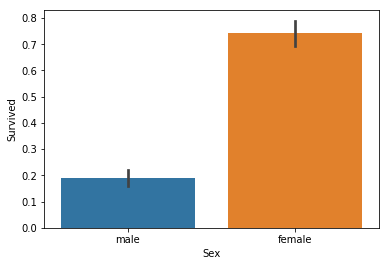

In [165]:
#Generando una gráfica de barras de Survived (Sobrevivió) por Sex (Sexo)

sns.barplot(x="Sex", y="Survived", data=train)

#Imprimiendo el pocentaje de mujeres versus hombres que sobrevivieron


#En esta parte se está haciendo uso del método 'value_counts(normalize=True/False)', el cual ayuda a obtener el
#porcentaje de los datos que se están graficando. Este método devuelve una serie que contiene conteos de valores únicos.
#Puede contener parámetros, entre los que se cuentan: normalize (que solo admite valores booleanos) y si es verdadero
#devolverá la frecuencia relativa dividiendo todos los valores por la suma de los valores.

print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize =
                                                                                                      True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = 
                                                                                                  True)[1]*100)

Como se predijo, **las mujeres tienen una probabilidad más alta de sobrevivir** que los hombres.

### Variable Pclass

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


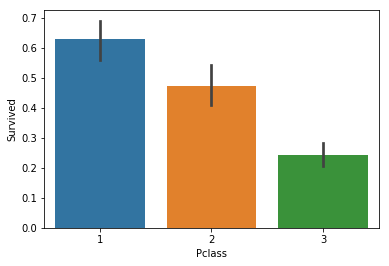

In [166]:
#Generando una gráfica de barras de sobreviviente por Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#Imprimiendo el porcentaje de personas por clase que sobrevivieron
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = 
                                                                                                     True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = 
                                                                                                     True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = 
                                                                                                     True)[1]*100)

Como se predijo, **las personas con una clase socioeconómica más alta tenían una tasa de supervivencia más alta** (62.9% vs. 47.3% vs. 24.2%).

### Variable SibSp

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


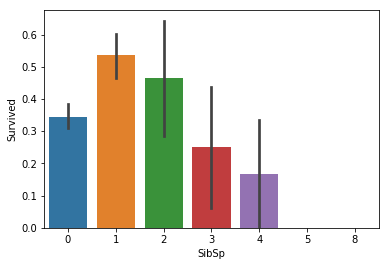

In [167]:
#Generando una gráfica para SibSp vs. sobreviviente
sns.barplot(x="SibSp", y="Survived", data=train)

#No imprimiré los porcentajes individuales para todos ellos.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = 
                                                                                                   True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = 
                                                                                                   True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = 
                                                                                                   True)[1]*100)

En general, está claro que las personas con más hermanos o cónyuges a bordo tenían menos probabilidades de sobrevivir. Sin embargo, al contrario de lo que se esperaba, las personas sin hermanos o esposos tenían menos probabilidades de sobrevivir que aquellas con uno o dos (34.5% vs 53.4% ​​vs. 46.4%)

### Variable Parch 

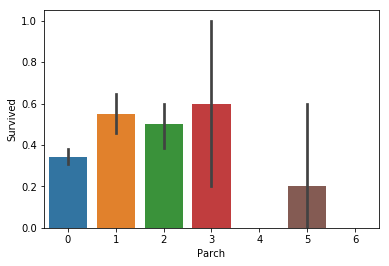

In [168]:
#Generando una gráfica de Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

Las personas con menos de cuatro padres o niños a bordo tienen más probabilidades de sobrevivir que aquellas con cuatro o más. Una vez más, las personas que viajan solas tienen menos probabilidades de sobrevivir que aquellas con 1-3 padres o hijos.

### Variable Edad

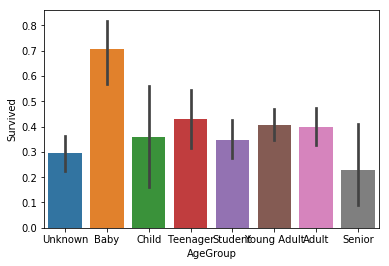

In [169]:
#organizando las edades en categorías lógicas
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#Generando un gráfico de barras Edad versus sobreviviente
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

#El método cut() guarda los valores en intervalos discretos. Puede ser usado cuando se requiera segmentar y ordenar
#los valores de los datos en contenedores. Esta función es útil para pasar de una variable continua a una categórica.
#Por ejemplo, cut() podría convertir edades en grupos de rangos de edad. Cut() puede contener atributos, como bins y
#labels, donde bins (en caso de ser un número entero) define el número de contenedores en donde se almacenarán los
#datos; mientras que labels, define el número de etiquetas de los contenedores creados. Su valor puede ser una matriz,
#o un booleano, y debe tener la misma longitud que los contenedores creados. Además de estos atributos, es importante
#contar con el atributo x, que corresponde a la matriz a ser dividida (esta debe ser unidimensional).



#El método fillna, por su parte, permite rellenar los valores Na, NaN. En este caso,los valores NaN, son rellenados
#con -0.5.


Como se puede observar en la gráfica anterior, **los bebés tienen más probabilidades de vivir** en comparación con cualquier otro grupo de edad.

### Característica Cabin

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


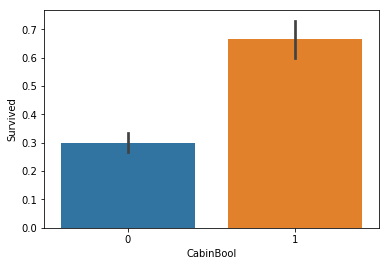

In [170]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))


#Cálculo de porcentajes de CabinBool versus sobrevivientes
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

#Generando un gráfico de barras con los datos de interés
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()


#En esta celda, el método notnull() se utiliza para detectar valores existentes (no faltantes).
#La sintaxis dada en la primera línea de esta celda, persigue modificar el valor y el nombre de la columna Cabin
#del DataFrame establecido.Se aplica para otras celdas.

#En lo que respecta al método astype(), convierte los elementos de una matriz, en el tipo de datos especificado en
#su argumento.En este caso, los convierte al tipo int, o entero.

Las personas con un número de cabina registrado son, de hecho, más propensas a sobrevivir. (66.6% vs 29.9%)

## Paso 4: Limpiando los datos

¡Es hora de limpiar nuestros datos para tener en cuenta los valores perdidos y la información innecesaria!


### Mirando los datos de prueba

¡Veamos cómo se ven nuestros datos de prueba!

In [171]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


**Observaciones:**

* Tenemos un total de 418 pasajeros.
* 1 valor de la característica Fare está faltando.
* Alrededor de 20.5% de la variable Age está faltando, por lo que necesitaremos limpiar eso.
* La función drop() también se usa para eliminar los valores faltantes aplicándolo sobre el resultado de la función isnull().

### Variable Cabina

In [172]:
# Comenzaremos eliminando la característica Cabin, ya que no se puede extraer ninguna información útil.

# En este caso se utilizó otra de las funcionalidades del método drop(), con el fin de eliminar la columna concerniente 
# a los datos de la característica Cabin. (NOTA: se debe tener en cuenta, que si queremos eliminar una fila o una
# columna, debemos indicarlo en el argumento de la función, mediante el parámetro 'axis=0' para una fila, o 'axis=1'
# para una columna). Como se puede ver, el primer elemento en el argumento de esta función es un índice del DataFrame
#train.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Variable Ticket

In [173]:
# También podemos eliminar la característica Ticked, ya que es poco probable que proporcione información útil.
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [174]:
# Es necesario rellenar los valores faltantes en la característica Embarked
#Para ello se determina, en principio, la cantidad de pasajeros que enbarcaron en cada
#una de las localidades especificadas en el conjunto de datos.
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)


#El método shape() devuelve una tupla de los datos especificados. El índice de shape(), en este caso,
#hace referencia a un elemento específico de una tupla, en este caso al elemento de la posición 0.

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


Está claro que **la mayoría de las personas se embarcaron en Southampton (S)**. Sigamos adelante y completemos los valores que faltan con S.

In [175]:
# Reemplazando los valores faltantes en la característica Embarqued con S
# En esta parte se asume que las personas que no tienen datos de embarque, abordaron en Southampton, como los demás.
#Como se hizo anteriormente, aquí también se usa fillna pare este fin específico.

train = train.fillna({"Embarked": "S"})

### Variable Age

A continuación, rellenaremos los valores que faltan en la característica Age. Como falta un porcentaje mayor de valores, sería ilógico llenarlos todos con el mismo valor (como hicimos con Embarked). En su lugar, tratemos de encontrar una manera de predecir las edades faltantes.

In [176]:
# Creando un grupo combinado de los dos conjuntos de datos
combine = [train, test]

# Extraer un título de cada Nombre en los conjuntos train y test
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])


#El método crostab() de Pandas, permite obener una tabla de dos o más valores.
#El método extract(), por su parte, permite extraer cierto tipo de datos de un conjunto.

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [177]:
# Reemplazando varios títulos con nombres más comunes
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


#El método replace(), ayuda a reemplazar los valores de un DataFrame con otros valores. En esta parte, los nombres
#extraídos de los conjuntos de datos combinados anteriormente, son reemplazados con otros nombres.

#El método groupby(), se utiliza para dividir los datos en grupos, empleando ciertos criterios.
#El método mean(), por su parte, devuelve la media de los valores agrupados.

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [178]:
#mapeando cada título del grupo en un valor numérico
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

#En esta parte, cada título mostrado en la salida anterior, es mapeado con un valor numérico.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [179]:
# Completando la edad faltante con el modo de AgeGroup para cada título.
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}


for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [180]:
#Mapeando cada valor de edad con un valor numérico
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#Eliminando la variable Age
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

### Variable Nombre

Podemos eliminar la variable nombre ahora que hemos extraído los títulos.

In [181]:
#Eliminando la variable Name, pues no contiene mucha información útil
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Variable Sex

In [182]:
#Mapeando cada valor de la variable Sex con un valor numérico
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4,0,1
1,2,1,1,1,1,0,71.2833,C,6,1,3
2,3,1,3,1,0,0,7.9250,S,5,0,2
3,4,1,1,1,1,0,53.1000,S,5,1,3
4,5,0,3,0,0,0,8.0500,S,5,0,1


### Variable Embarked

In [183]:
#Mapeando cada valor de Embarker con un valor numérico
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4,0,1
1,2,1,1,1,1,0,71.2833,2,6,1,3
2,3,1,3,1,0,0,7.9250,1,5,0,2
3,4,1,1,1,1,0,53.1000,1,5,1,3
4,5,0,3,0,0,0,8.0500,1,5,0,1


### Variable Fare

In [184]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#Mapeando los valores de Fare con grupos de valores numéricos
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#Eliminando los valores de la variable Fare
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [185]:
#Verificando los datos del conjunto de entrenamiento
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1,1
1,2,1,1,1,1,0,2,6,1,3,4
2,3,1,3,1,0,0,1,5,0,2,2
3,4,1,1,1,1,0,1,5,1,3,4
4,5,0,3,0,0,0,1,5,0,1,2


In [186]:
#Verificando los datos del conjunto de prueba
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


## Seleccionando el mejor modelo

### Dividiendo los datos de entrenamiento

Utilizaremos parte de nuestros datos de entrenamiento (22% en este caso) para probar la precisión de nuestros diferentes modelos.

In [187]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

### Probando diferentes modelos

Estaré probando los siguientes modelos con mis datos de entrenamiento (obtuve la lista de aquí):

* Gaussian Naive Bayes
* Regresión logística
* Máquinas de vectores de soporte
* Perceptron
* Clasificador de árboles de decisión
* Clasificador de bosque aleatorio
* KNN o k-vecinos más cercanos
* Pendiente de gradiente estocástico
* Clasificador de aumento de gradiente

Para cada modelo, establecemos el modelo, lo ajustamos con el 80% de nuestros datos de entrenamiento, pronosticamos el 20% de los datos de entrenamiento y verificamos la precisión.

In [188]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [189]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.19


In [190]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [191]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.17


In [192]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

79.19


In [193]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.2


In [194]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.26


In [195]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.66


In [196]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

81.22


In [197]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.77


### Comprobando la precisión de cada modelo

In [198]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.77
3,Random Forest,84.26
0,Support Vector Machines,82.74
8,Stochastic Gradient Descent,81.22
7,Decision Tree,80.20
2,Logistic Regression,79.19
5,Perceptron,79.19
4,Naive Bayes,78.68
6,Linear SVC,78.17
1,KNN,77.66
